In [1]:
import numpy as np 
import pandas as pd
from scipy.interpolate import UnivariateSpline 
import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
pCDR = pd.read_csv('Data/pCDR.csv')
data = pd.read_csv('Data/chroma.csv')

In [3]:
g4_disagreement = np.array([1.199, 0.583, 0.813, 1.16, 0.74, 1.309, 1.111, 0.018, 0.008, 1.007, 1.817])
eff = np.array([data['VUV4 Er - PTE'], data['VUV4 UA - PTE'], data['FBK Er - PTE']])
av = np.mean(eff, axis=0)
std = np.std(eff, axis=0)
err = np.sqrt(std**2 + np.max(g4_disagreement)**2)

In [12]:
for ii,(x,y) in enumerate(zip(av,err)):
    print('At {:.2f}% reflectivity the average PTE in the FV of nEXO is ({:.2f}±{:.2f})%'.format(ii*10,x,y))

At 0.00% reflectivity the average PTE in the FV of nEXO is (17.28±1.90)%
At 10.00% reflectivity the average PTE in the FV of nEXO is (18.60±1.90)%
At 20.00% reflectivity the average PTE in the FV of nEXO is (19.88±1.91)%
At 30.00% reflectivity the average PTE in the FV of nEXO is (21.44±1.88)%
At 40.00% reflectivity the average PTE in the FV of nEXO is (23.09±1.86)%
At 50.00% reflectivity the average PTE in the FV of nEXO is (25.21±1.94)%
At 60.00% reflectivity the average PTE in the FV of nEXO is (27.44±1.94)%
At 70.00% reflectivity the average PTE in the FV of nEXO is (30.27±1.92)%
At 80.00% reflectivity the average PTE in the FV of nEXO is (33.41±1.95)%
At 90.00% reflectivity the average PTE in the FV of nEXO is (37.28±1.90)%
At 100.00% reflectivity the average PTE in the FV of nEXO is (42.30±1.86)%


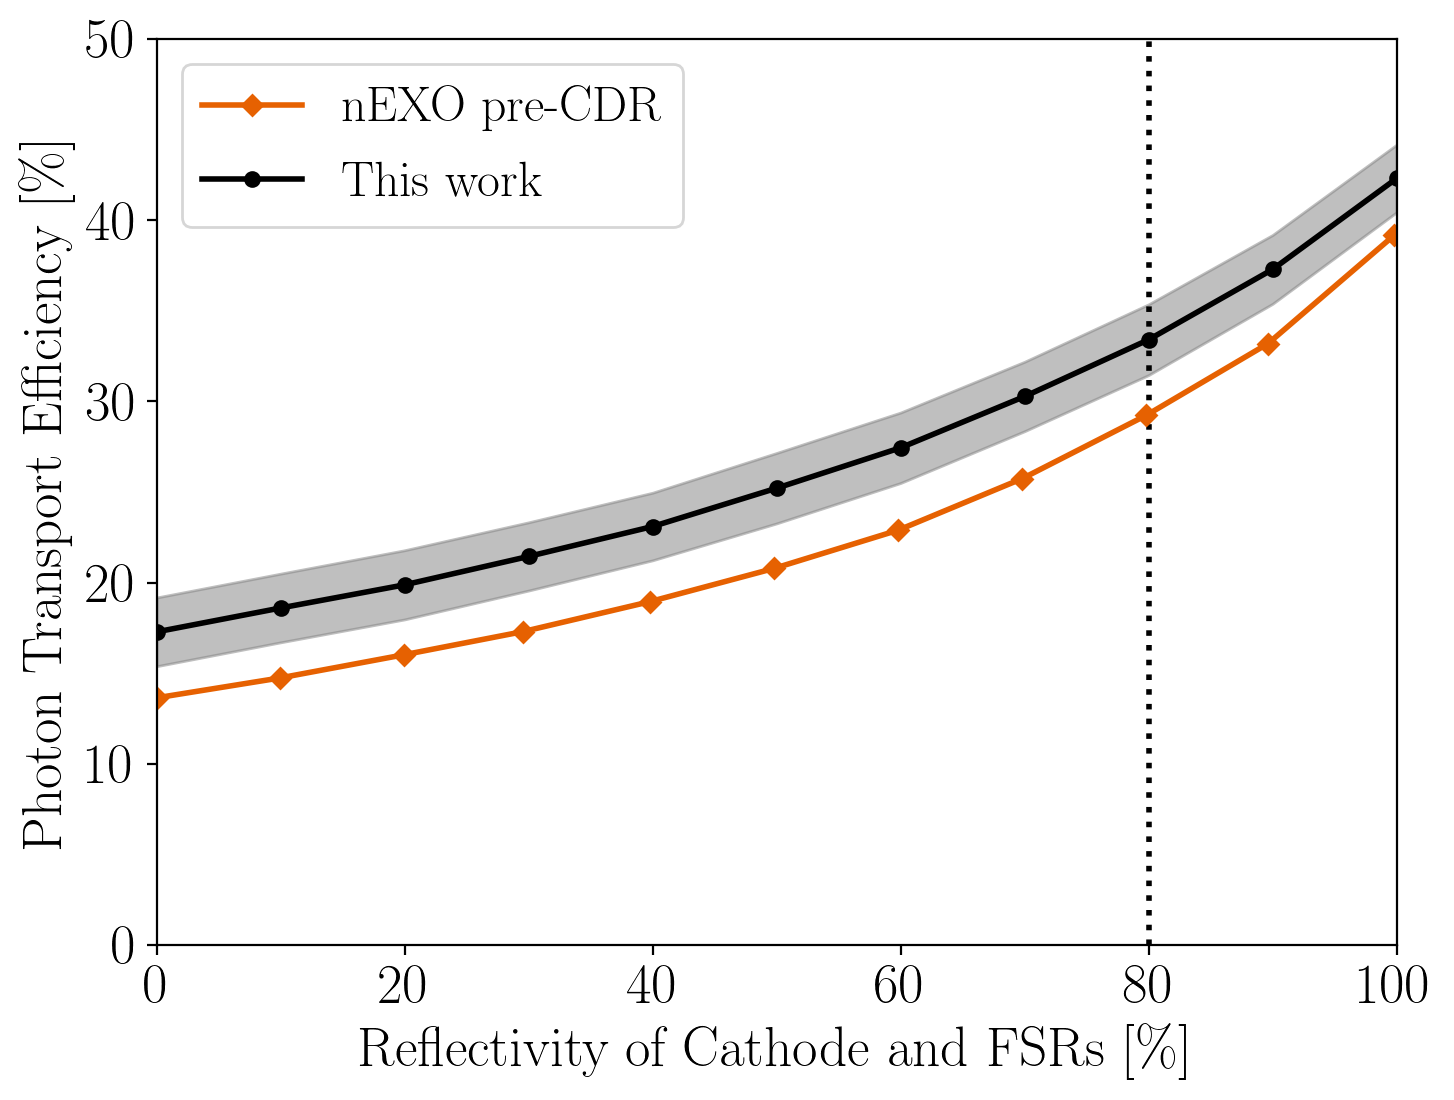

In [4]:
fig = plt.figure()

plt.xlim(0,100)
plt.ylim(0,50)

plt.xlabel('Reflectivity of Cathode and FSRs [$\%$]')
plt.ylabel('Photon Transport Efficiency [$\%$]')

plt.plot(pCDR['Reflectivity'], pCDR['PTE'],  markersize=5, color=colors[1], marker='D', label='nEXO pre-CDR')
plt.plot(data['Reflectivity'], av, markersize=5, color='k', marker='o', label='This work')

plt.fill_between(data['Reflectivity'], av-err, av+err, color='grey', alpha=0.5 , label='')

plt.vlines(x=80, ymin=0,ymax=50, ls=':', color='k')

plt.legend(loc='upper left')
plt.savefig('pte_vs_reflectivity.pdf')